In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from pandas import Series
import s2sphere as s2
%matplotlib inline

In [16]:
positives = pandas.read_csv('./p.csv', dtype=np.float)

In [18]:
positives.shape

(27651, 3)

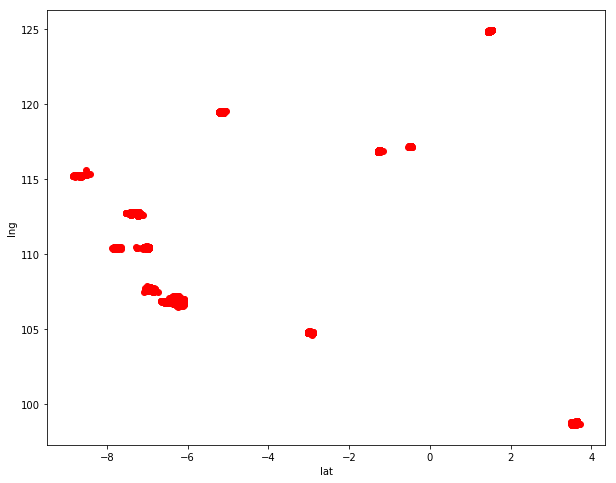

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(positives['lat'], positives['lng'], color='r')
plt.ylabel('lng')
plt.xlabel('lat')
plt.show()

In [28]:
negatives = pandas.read_csv('./n.csv', dtype=np.float)

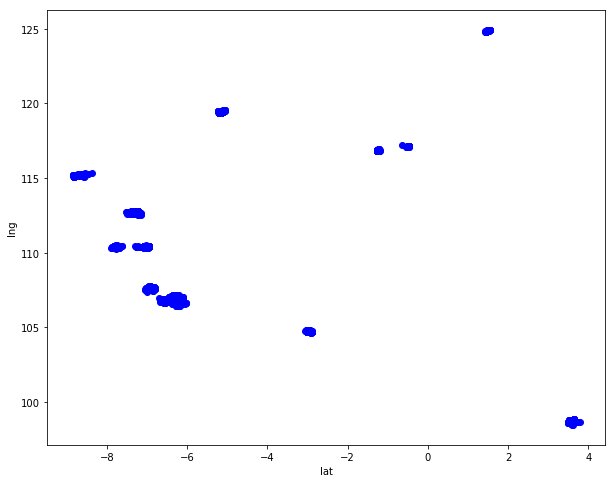

In [29]:
plt.figure(figsize=(10,8))
plt.scatter(negatives['lat'], negatives['lng'], color='b')
plt.ylabel('lng')
plt.xlabel('lat')
plt.show()

In [30]:
positives['class'] = "positives"
negatives['class'] = "negatives"

frames = [positives, negatives]
result = pandas.concat(frames)

In [31]:
result.tail()

,lat,lng,s2_id,class
27647,-6.224313,106.816824,3.344470e+18,negatives
27648,-6.135677,106.789150,3.344518e+18,negatives
27649,3.571309,98.668853,3.472610e+18,negatives
27650,-6.251063,106.793267,3.344469e+18,negatives
27651,-6.224505,106.804043,3.344470e+18,negatives


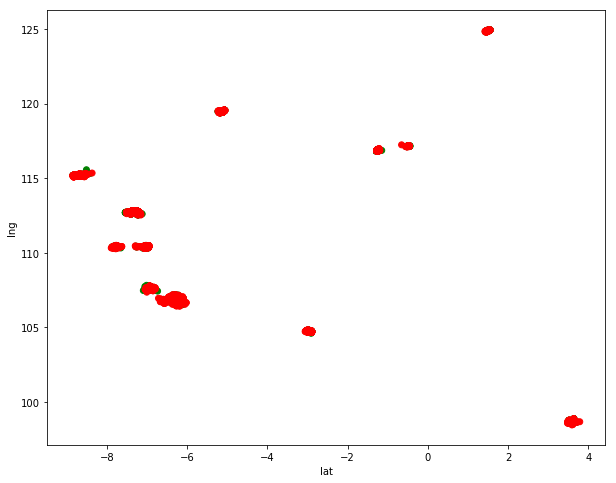

In [33]:
colors = {'positives':'green', 'negatives':'red'}

plt.figure(figsize=(10,8))
plt.scatter(result['lat'], result['lng'], label="class", c=result['class'].apply(lambda x: colors[x]))
plt.ylabel('lng')
plt.xlabel('lat')
plt.show()

In [ ]:
negatives_location = negatives.iloc[:,:2]
negatives_location.head(10)

In [ ]:
def latlong_s2id(lat,lon,s2_size):
    pos = s2.LatLng.from_degrees(lat, lon)
    s2cell = s2.CellId.from_lat_lng(pos).parent(s2_size)
    return str(s2cell.id())

In [87]:
latlong_s2id(-8,115,13)

'3301598242982068224'

In [2]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

In [88]:
import pandas
import numpy as np

pickup_locations = pandas.read_csv('./train.csv', dtype=np.float)
print(pickup_locations.head(10))

from sklearn.cluster import KMeans

clustering_algo = KMeans(n_clusters=8)

labels = clustering_algo.fit_predict(pickup_locations)

cluster_sizes = {i: len(np.where(clustering_algo.labels_ == i)[0]) for i in range(clustering_algo.n_clusters)}

cluster_centers = clustering_algo.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)





        lat         lng
0 -6.201831  106.824836
1 -6.203688  106.823459
2 -6.205968  106.818030
3 -6.202935  106.818513
4 -6.202405  106.823455
5 -6.197943  106.828596
6 -6.197555  106.824558
7 -6.205077  106.821709
8 -6.201414  106.822153
9 -6.203839  106.820509


In [24]:
test_location = [-6.2040803, 106.8217632]
predicted_label = clustering_algo.predict(np.array(test_location).reshape(1, -1))

predicted_cluster_center = cluster_centers[predicted_label][0]

pickup_locations['class']=labels
colors = {0:'green', 1:'red', 2:'blue', 3:'yellow', 4:'m', 5:'orange', 6: 'black', 7:'cyan'}

predicted_cluster_points = pickup_locations[pickup_locations['class'] == predicted_label[0]]
from haversine import haversine

center = predicted_cluster_points.iloc[0]
min_dist = haversine((test_location[0], test_location[1]), (center.lat, center.lng))
for _, point in predicted_cluster_points.iterrows():
    dist = haversine((test_location[0], test_location[1]), (point.lat, point.lng))
    if dist < min_dist:
        min_dist = dist
        center = point

optimal_pickup_location = center
print("optimal_pickup_location")
print(optimal_pickup_location)
print("minimum distance", min_dist)

***************  predicted label
[7]
        lat         lng  class
0 -6.201831  106.824836      2
1 -6.203688  106.823459      2
2 -6.205968  106.818030      5
3 -6.202935  106.818513      1
4 -6.202405  106.823455      2
************ . optimal_pickup_location
lat       -6.204247
lng      106.821859
class      7.000000
Name: 1409, dtype: float64 0.021293006905119795


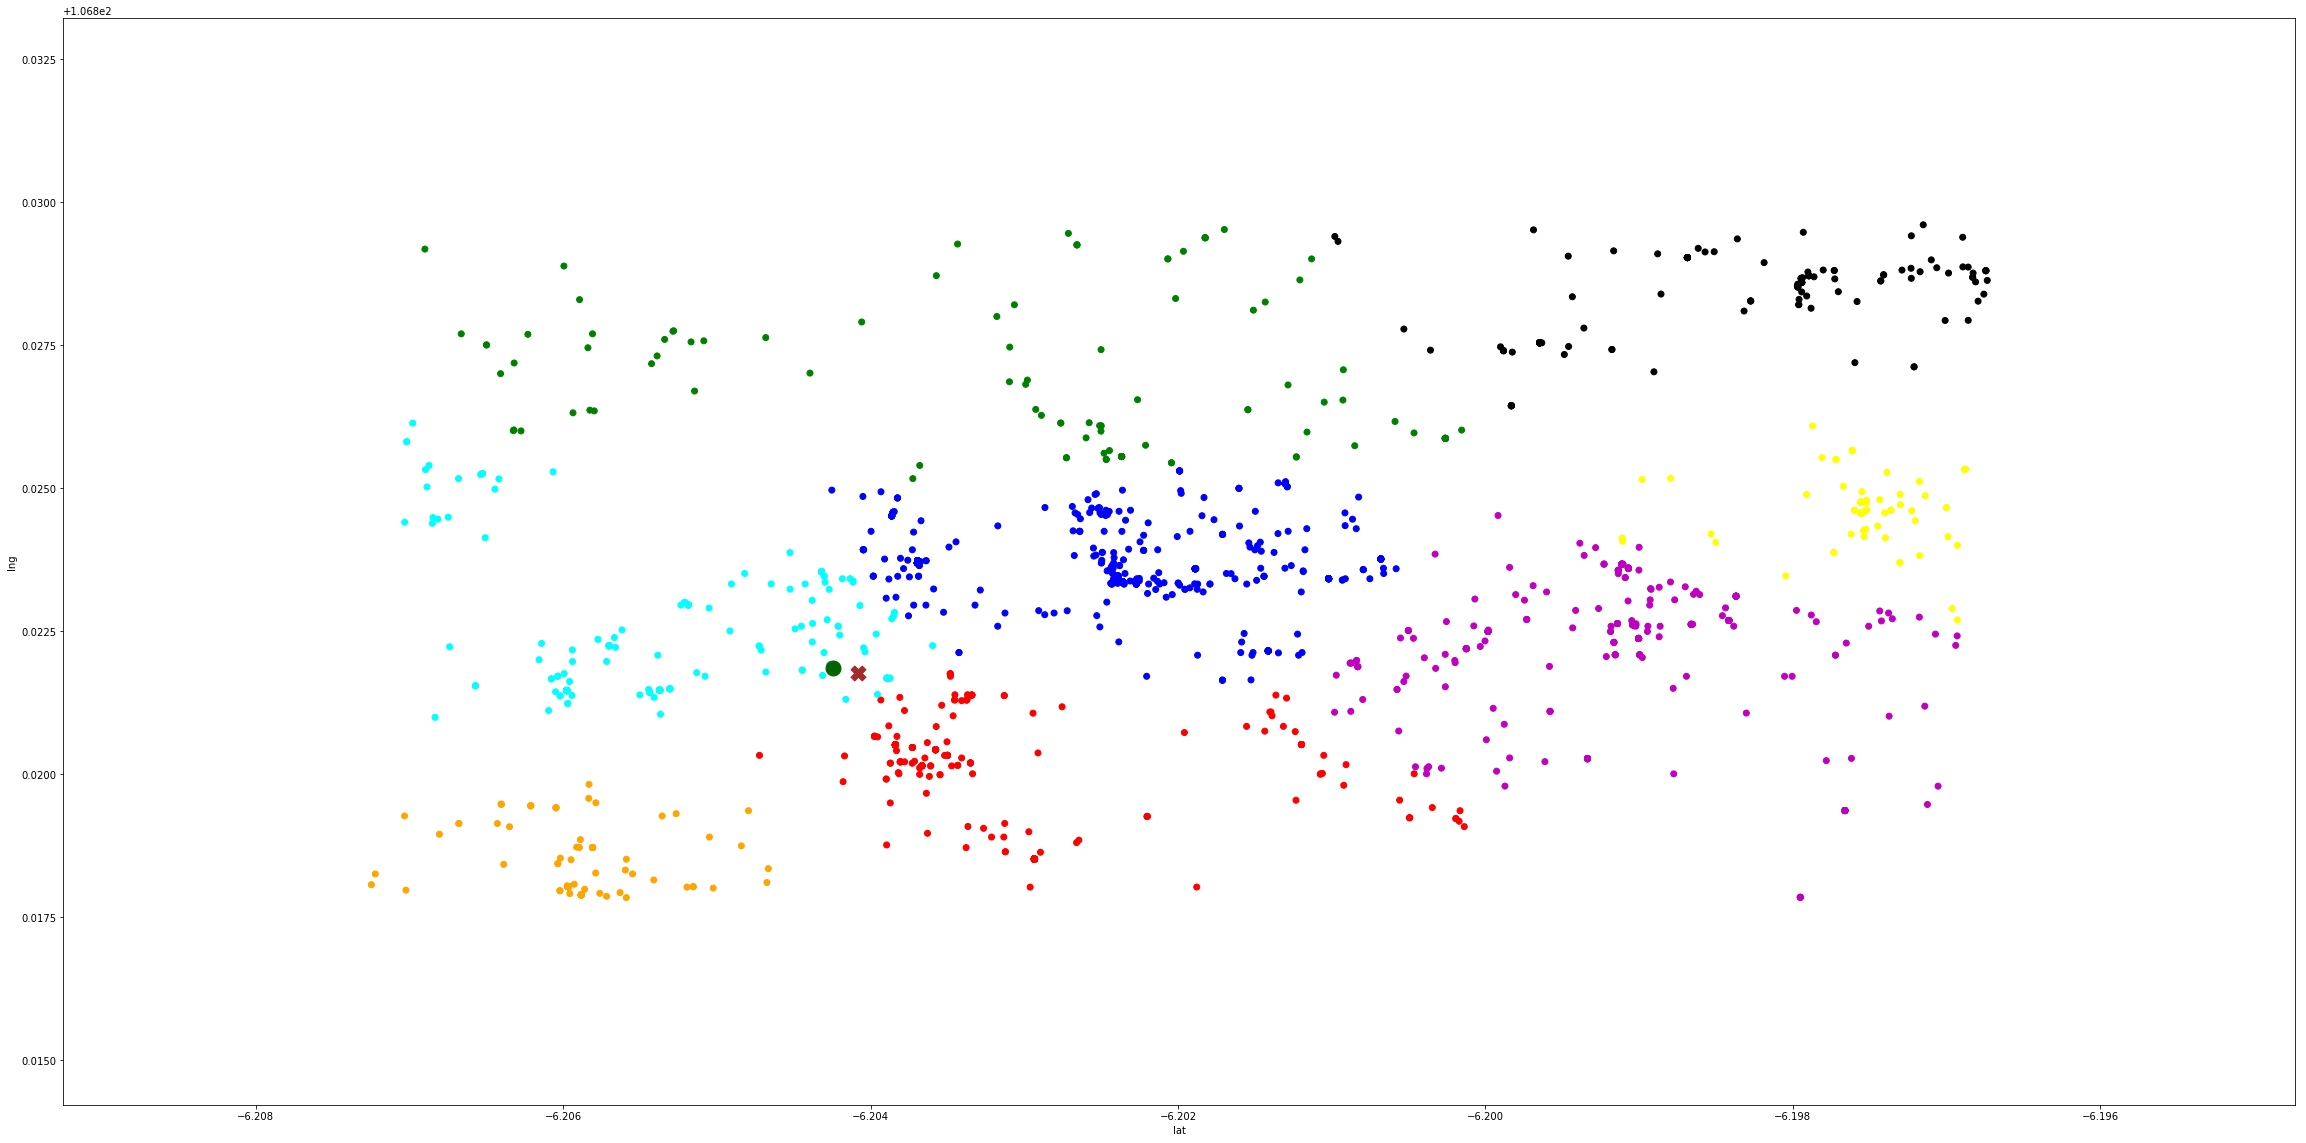

In [29]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(figsize=(40,20))
plt.scatter(pickup_locations['lat'], pickup_locations['lng'], label="class", c=pickup_locations['class'].apply(lambda x: colors[x]))
plt.scatter(test_location[0], test_location[1], marker='X',  s = 224, color='brown')
plt.scatter(optimal_pickup_location[0], optimal_pickup_location[1], marker='o',  s = 224, color='darkgreen')
plt.ylabel('lng')
plt.xlabel('lat')
plt.show()

In [45]:
import gmplot

pathlon = test_location[1], optimal_pickup_location[1]
pathlat = test_location[0], optimal_pickup_location[0]

gmap = gmplot.GoogleMapPlotter(pathlat[0],pathlon[0],18)

gmap.plot(pathlat,pathlon,'cornflowerblue', edge_width=10)

gmap.draw('map.html')